Importing Libraries...

In [295]:
from bs4 import BeautifulSoup as bs
import requests
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Extracting Iphone's Data:

In [296]:
headers = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:103.0) Gecko/20100101 Firefox/103.0',
           'Accept-Language' : 'en-US,en;q=0.5'})
apple_heading = []
apple_actualPrice = []
apple_currentPrice = []
apple_discount = []
apple_rating = []
apple_nRatings = []
apple_nReviews = []
for num in range(1,17):
    url = 'https://www.flipkart.com/mobiles/pr?sid=tyy%2C4io&p%5B%5D=facets.brand%255B%255D%3DApple&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_8_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_92RED14GXPXF_wp2&fm=neo%2Fmerchandising&iid=M_b7feba1b-d7d0-442d-9903-33c4bd649ffc_3.92RED14GXPXF&ppt=hp&ppn=homepage&ssid=hhrmp14ykg0000001656939629148&page='+str(num)
    apple_site = requests.get(url,headers = headers)
    apple_soup = bs(apple_site.content,'html.parser')
    apple_dblock = apple_soup.findAll('div',attrs = {'class':'_2kHMtA'})
    
    for i in apple_dblock:
        if 'Currently unavailable' not in i.text:
            # Extracting Heading...
            for _iter in i.findAll('div',attrs = {'class':'_4rR01T'}):
                appleHeading = _iter.text
                apple_heading.append(appleHeading)

            # Extracting Current Price...
            for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                appleCp = _iter.text
                x = appleCp.strip('₹')
                x = x.replace(',','')
                apple_currentPrice.append(int(x))

            # Extracting Actual Price...
            if 'off' in i.text:
                for _iter in i.findAll('div',attrs = {'class':'_3I9_wc _27UcVY'}):
                    appleAp = _iter.text
                    x = appleAp.strip('₹')
                    x = x.replace(',','')
                    apple_actualPrice.append(int(x))
            else:
                for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                    appleAp = _iter.text
                    x = appleAp.strip('₹')
                    x = x.replace(',','')
                    apple_actualPrice.append(int(x))

            # Extracting Discount...
            if 'off' in i.text:
                for _iter in i.findAll('div',attrs = {'class':'_3Ay6Sb'}):
                    appleDis = _iter.text
                    x = str(re.findall(r'\d+',appleDis))
                    x = x.strip("[]'")
                    apple_discount.append(int(x))
            else:
                apple_discount.append(None)

            # Extracting Rating...
            for _iter in i.findAll('div',attrs = {'class':'_3LWZlK'}):
                appleR = _iter.text
                x = float(appleR)
                apple_rating.append(x)

            # Extracting Nratings and Nreviews...
            for _iter in i.findAll('span',attrs = {'class':'_2_R_DZ'}):
                Ra_Re = _iter.text
                Ra_Re = Ra_Re.split('&')
                # Extracting Ratings...
                Ra = Ra_Re[0]
                Ra = Ra.split(' ')
                Ra = Ra[0].replace(',','')
                apple_nRatings.append(int(Ra))
                # Extracting Reviews...
                Re = Ra_Re[1].split(' ')
                Re = Re[0].strip('\xa0').replace(',','')
                apple_nReviews.append(int(Re))
                
# Converting all Apple Data into DatFrame...
apple_data = {'Heading':apple_heading,
              'Actual_Price':apple_actualPrice,
              'Current_Price':apple_currentPrice,
              'Discount':apple_discount,
              'Rating':apple_rating,
              'No_Ratings':apple_nRatings,
              'No_Reviews':apple_nReviews}
apple_data = pd.DataFrame(apple_data)
apple_data

,Heading,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
0,"APPLE iPhone 11 (White, 64 GB)",49900,46999,5.0,4.6,91893,6808
1,"APPLE iPhone 11 (Black, 64 GB)",49900,46999,5.0,4.6,91893,6808
2,"APPLE iPhone 12 (Purple, 256 GB)",80900,74999,7.0,4.6,179447,12367
3,"APPLE iPhone 12 (Black, 256 GB)",80900,74999,7.0,4.6,179447,12367
4,"APPLE iPhone 11 (Green, 64 GB)",49900,46999,5.0,4.6,91893,6808
...,...,...,...,...,...,...,...
193,"APPLE iPhone 13 Mini (Blue, 512 GB)",99900,92999,6.0,4.5,1893,183
194,"APPLE iPhone XR (White, 128 GB)",52900,44999,14.0,4.6,100187,8564
195,"APPLE iPhone 12 Pro Max (Pacific Blue, 512 GB)",149900,149900,NaN,4.6,1239,102
196,"APPLE iPhone 12 Pro Max (Gold, 256 GB)",129900,129900,NaN,4.6,1239,102


### Extracting Samsung Data:

In [297]:
headers = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:103.0) Gecko/20100101 Firefox/103.0',
           'Accept-Language' : 'en-US,en;q=0.5'})
ss_heading = []
ss_actualPrice = []
ss_currentPrice = []
ss_discount = []
ss_rating = []
ss_nRatings = []
ss_nReviews = []
for num in range(1,43):
    url = 'https://www.flipkart.com/search?q=samsung+mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_8_na_na_na&as-pos=1&as-type=RECENT&suggestionId=samsung+mobiles%7CMobiles&requestId=732692a0-d6bf-4e9c-b5a8-80fbaa8468b3&as-backfill=on&page='+str(num)
    ss_site = requests.get(url,headers = headers)
    ss_soup = bs(ss_site.content,'html.parser')
    ss_dblock = ss_soup.findAll('div',attrs = {'class':'_2kHMtA'})
    
    for i in ss_dblock:
        if 'Currently unavailable' not in i.text:
            if ('Ratings' in i.text) and ('Reviews' in i.text):
                # Extracting Heading...
                for _iter in i.findAll('div',attrs = {'class':'_4rR01T'}):
                    ssHeading = _iter.text
                    ss_heading.append(ssHeading)

                # Extracting Current Price...
                for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                    ssCp = _iter.text
                    x = ssCp.strip('₹')
                    x = x.replace(',','')
                    ss_currentPrice.append(int(x))

                # Extracting Actual Price...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3I9_wc _27UcVY'}):
                        ssAp = _iter.text
                        x = ssAp.strip('₹')
                        x = x.replace(',','')
                        ss_actualPrice.append(int(x))
                else:
                    for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                        ssAp = _iter.text
                        x = ssAp.strip('₹')
                        x = x.replace(',','')
                        ss_actualPrice.append(int(x))

                # Extracting Discount...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3Ay6Sb'}):
                        ssDis = _iter.text
                        x = str(re.findall(r'\d+',ssDis))
                        x = x.strip("[]'")
                        ss_discount.append(int(x))
                else:
                    ss_discount.append(None)

                # Extracting Rating...
                for _iter in i.findAll('div',attrs = {'class':'_3LWZlK'}):
                    ssR = _iter.text
                    x = float(ssR)
                    ss_rating.append(x)

                # Extracting Nratings or Nreviews...
                for _iter in i.findAll('span',attrs = {'class':'_2_R_DZ'}):
                    Ra_Re = _iter.text
                    Ra_Re = Ra_Re.split('&')
                    # Extracting Ratings...
                    Ra = Ra_Re[0]
                    Ra = Ra.split(' ')
                    Ra = Ra[0].replace(',','')
                    ss_nRatings.append(int(Ra))
                    # Extracting Reviews...
                    Re = Ra_Re[1].split(' ')
                    Re = Re[0].strip('\xa0').replace(',','')
                    ss_nReviews.append(int(Re))
                
# Converting all Samsung Data into DatFrame...
samsung_data = {'Heading':ss_heading,
              'Actual_Price':ss_actualPrice,
              'Current_Price':ss_currentPrice,
              'Discount':ss_discount,
              'Rating':ss_rating,
              'No_Ratings':ss_nRatings,
              'No_Reviews':ss_nReviews}
samsung_data = pd.DataFrame(samsung_data)
samsung_data

,Heading,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
0,"SAMSUNG Galaxy F12 (Sky Blue, 128 GB)",13999,11499,17.0,4.3,287671,22996
1,"SAMSUNG Galaxy F12 (Sea Green, 128 GB)",13999,11499,17.0,4.3,287671,22996
2,"SAMSUNG Galaxy F12 (Sky Blue, 64 GB)",12999,10499,19.0,4.3,287671,22996
3,"SAMSUNG Galaxy F12 (Sea Green, 64 GB)",12999,10499,19.0,4.3,287671,22996
4,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB)",14999,11999,20.0,4.4,8692,457
...,...,...,...,...,...,...,...
295,"SAMSUNG Galaxy A6 (Blue, 64 GB)",25500,23799,6.0,4.3,696,70
296,"SAMSUNG Galaxy S8 Plus (Maple Gold, 64 GB)",59000,54099,8.0,4.6,2003,339
297,"SAMSUNG Galaxy C9 Pro (Gold, 64 GB)",31900,31900,NaN,4.4,4040,682
298,"SAMSUNG Galaxy J6 Plus (Black, 64 GB)",13800,13800,NaN,4.3,4947,401


### Extracting OnePlus Data:

In [298]:
headers = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:103.0) Gecko/20100101 Firefox/103.0',
           'Accept-Language' : 'en-US,en;q=0.5'})
op_heading = []
op_actualPrice = []
op_currentPrice = []
op_discount = []
op_rating = []
op_nRatings = []
op_nReviews = []
for num in range(1,6):
    url = 'https://www.flipkart.com/search?q=oneplus+mobile&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(num)
    op_site = requests.get(url,headers = headers)
    op_soup = bs(op_site.content,'html.parser')
    op_dblock = op_soup.findAll('div',attrs = {'class':'_2kHMtA'})
    
    for i in op_dblock:
        if 'Currently unavailable' not in i.text:
            if ('Ratings' in i.text) and ('Reviews' in i.text):
                # Extracting Heading...
                for _iter in i.findAll('div',attrs = {'class':'_4rR01T'}):
                    opHeading = _iter.text
                    op_heading.append(opHeading)

                # Extracting Current Price...
                for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                    opCp = _iter.text
                    x = opCp.strip('₹')
                    x = x.replace(',','')
                    op_currentPrice.append(int(x))

                # Extracting Actual Price...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3I9_wc _27UcVY'}):
                        opAp = _iter.text
                        x = opAp.strip('₹')
                        x = x.replace(',','')
                        op_actualPrice.append(int(x))
                else:
                    for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                        opAp = _iter.text
                        x = opAp.strip('₹')
                        x = x.replace(',','')
                        op_actualPrice.append(int(x))

                # Extracting Discount...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3Ay6Sb'}):
                        opDis = _iter.text
                        x = str(re.findall(r'\d+',opDis))
                        x = x.strip("[]'")
                        op_discount.append(int(x))
                else:
                    op_discount.append(None)

                # Extracting Rating...
                for _iter in i.findAll('div',attrs = {'class':'_3LWZlK'}):
                    opR = _iter.text
                    x = float(opR)
                    op_rating.append(x)

                # Extracting Nratings or Nreviews...
                for _iter in i.findAll('span',attrs = {'class':'_2_R_DZ'}):
                    Ra_Re = _iter.text
                    Ra_Re = Ra_Re.split('&')
                    # Extracting Ratings...
                    Ra = Ra_Re[0]
                    Ra = Ra.split(' ')
                    Ra = Ra[0].replace(',','')
                    op_nRatings.append(int(Ra))
                    # Extracting Reviews...
                    Re = Ra_Re[1].split(' ')
                    Re = Re[0].strip('\xa0').replace(',','')
                    op_nReviews.append(int(Re))
                
# Converting all Oneplus Data into DatFrame...
oneplus_data = {'Heading':op_heading,
              'Actual_Price':op_actualPrice,
              'Current_Price':op_currentPrice,
              'Discount':op_discount,
              'Rating':op_rating,
              'No_Ratings':op_nRatings,
              'No_Reviews':op_nReviews}
oneplus_data = pd.DataFrame(oneplus_data)
oneplus_data

,Heading,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
0,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)",19960,19960,NaN,4.4,12688,1074
1,"OnePlus Nord 2T 5G (Jade Fog, 128 GB)",28986,28986,NaN,4.5,668,51
2,"OnePlus Nord 2 5G (PAC-MAN, 256 GB)",37999,36999,2.0,4.4,119,11
3,"OnePlus Nord 2T 5G (Jade Fog, 256 GB)",33870,33870,NaN,4.4,163,12
4,"OnePlus Nord 2T 5G (Gray Shadow, 128 GB)",28850,28850,NaN,4.5,668,51
5,"OnePlus Nord 2T 5G (Gray Shadow, 256 GB)",33958,33958,NaN,4.4,163,12
6,"OnePlus 8T 5G (Aquamarine Green, 128 GB)",37890,37890,NaN,4.5,91,10
7,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",19880,19880,NaN,4.4,12688,1074
8,"OnePlus 10R 5G (Sierra Black, 128 GB)",35999,35999,NaN,4.5,419,38
9,"OnePlus 10R 5G (Sierra Black, 256 GB)",41980,41980,NaN,4.4,162,14


### Extracting Redmi Data:

In [299]:
headers = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:103.0) Gecko/20100101 Firefox/103.0',
           'Accept-Language' : 'en-US,en;q=0.5'})
redmi_heading = []
redmi_actualPrice = []
redmi_currentPrice = []
redmi_discount = []
redmi_rating = []
redmi_nRatings = []
redmi_nReviews = []
for num in range(1,18):
    url = 'https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&ctx=eyJjYXJkQ29udGV4dCI6eyJhdHRyaWJ1dGVzIjp7InRpdGxlIjp7Im11bHRpVmFsdWVkQXR0cmlidXRlIjp7ImtleSI6InRpdGxlIiwiaW5mZXJlbmNlVHlwZSI6IlRJVExFIiwidmFsdWVzIjpbIlNob3AgTm93Il0sInZhbHVlVHlwZSI6Ik1VTFRJX1ZBTFVFRCJ9fX19fQ%3D%3D&otracker=clp_metro_expandable_7_3.metroExpandable.METRO_EXPANDABLE_Shop%2BNow_mobile-phones-store_OUJ0NDXWZCCJ_wp2&fm=neo%2Fmerchandising&iid=M_ba1dda1d-1162-41aa-889f-5cbc9c413e49_3.OUJ0NDXWZCCJ&ppt=sp&ppn=sp&ssid=8aoe8gckfk0000001657004373241&page='+str(num)
    redmi_site = requests.get(url,headers = headers)
    redmi_soup = bs(redmi_site.content,'html.parser')
    redmi_dblock = redmi_soup.findAll('div',attrs = {'class':'_2kHMtA'})
    
    for i in redmi_dblock:
        if 'Currently unavailable' not in i.text:
            if ('Ratings' in i.text) and ('Reviews' in i.text):
                # Extracting Heading...
                for _iter in i.findAll('div',attrs = {'class':'_4rR01T'}):
                    redmiHeading = _iter.text
                    redmi_heading.append(redmiHeading)

                # Extracting Current Price...
                for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                    redmiCp = _iter.text
                    x = redmiCp.strip('₹')
                    x = x.replace(',','')
                    redmi_currentPrice.append(int(x))

                # Extracting Actual Price...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3I9_wc _27UcVY'}):
                        redmiAp = _iter.text
                        x = redmiAp.strip('₹')
                        x = x.replace(',','')
                        redmi_actualPrice.append(int(x))
                else:
                    for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                        redmiAp = _iter.text
                        x = redmiAp.strip('₹')
                        x = x.replace(',','')
                        redmi_actualPrice.append(int(x))

                # Extracting Discount...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3Ay6Sb'}):
                        redmiDis = _iter.text
                        x = str(re.findall(r'\d+',redmiDis))
                        x = x.strip("[]'")
                        redmi_discount.append(int(x))
                else:
                    redmi_discount.append(None)

                # Extracting Rating...
                for _iter in i.findAll('div',attrs = {'class':'_3LWZlK'}):
                    redmiR = _iter.text
                    x = float(redmiR)
                    redmi_rating.append(x)

                # Extracting Nratings or Nreviews...
                for _iter in i.findAll('span',attrs = {'class':'_2_R_DZ'}):
                    Ra_Re = _iter.text
                    Ra_Re = Ra_Re.split('&')
                    # Extracting Ratings...
                    Ra = Ra_Re[0]
                    Ra = Ra.split(' ')
                    Ra = Ra[0].replace(',','')
                    redmi_nRatings.append(int(Ra))
                    # Extracting Reviews...
                    Re = Ra_Re[1].split(' ')
                    Re = Re[0].strip('\xa0').replace(',','')
                    redmi_nReviews.append(int(Re))
                
# Converting all Redmi Data into DatFrame...
redmi_data = {'Heading':redmi_heading,
              'Actual_Price':redmi_actualPrice,
              'Current_Price':redmi_currentPrice,
              'Discount':redmi_discount,
              'Rating':redmi_rating,
              'No_Ratings':redmi_nRatings,
              'No_Reviews':redmi_nReviews}
redmi_data = pd.DataFrame(redmi_data)
redmi_data

,Heading,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
0,"Redmi 9A Sport (Coral Green, 32 GB)",7990,7890,1.0,4.2,3781,301
1,"Redmi 9A Sport (Carbon Black, 32 GB)",6999,6847,2.0,4.2,13821,1088
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",6918,6918,NaN,4.2,13821,1088
3,"Redmi 9A Sport (Metallic Blue, 32 GB)",7999,7999,NaN,4.2,3781,301
4,"REDMI 10A (Slate grey, 64 GB)",9898,8849,10.0,4.1,1139,78
...,...,...,...,...,...,...,...
250,"Xiaomi 11T Pro 5G Hyperphone (Celestial Magic,...",39399,39399,NaN,4.0,256,30
251,"Redmi 9 (Carbon Black, 64 GB)",10990,9990,9.0,4.2,25892,1498
252,"Redmi Note 9 Pro (Interstellar Black, 128 GB)",16899,16899,NaN,4.4,1870,100
253,"Xiaomi 11T Pro 5G Hyperphone (Moonlight White,...",43998,40599,7.0,4.2,98,7


### Extracting Oppo Data:

In [300]:
headers = ({'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:103.0) Gecko/20100101 Firefox/103.0',
           'Accept-Language' : 'en-US,en;q=0.5'})
oppo_heading = []
oppo_actualPrice = []
oppo_currentPrice = []
oppo_discount = []
oppo_rating = []
oppo_nRatings = []
oppo_nReviews = []
for num in range(1,13):
    url = 'https://www.flipkart.com/search?q=oppo&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(num)
    oppo_site = requests.get(url,headers = headers)
    oppo_soup = bs(oppo_site.content,'html.parser')
    oppo_dblock = oppo_soup.findAll('div',attrs = {'class':'_2kHMtA'})
    
    for i in oppo_dblock:
        if 'Currently unavailable' not in i.text:
            if ('Ratings' in i.text) and ('Reviews' in i.text):
                # Extracting Heading...
                for _iter in i.findAll('div',attrs = {'class':'_4rR01T'}):
                    oppoHeading = _iter.text
                    oppo_heading.append(oppoHeading)

                # Extracting Current Price...
                for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                    oppoCp = _iter.text
                    x = oppoCp.strip('₹')
                    x = x.replace(',','')
                    oppo_currentPrice.append(int(x))

                # Extracting Actual Price...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3I9_wc _27UcVY'}):
                        oppoAp = _iter.text
                        x = oppoAp.strip('₹')
                        x = x.replace(',','')
                        oppo_actualPrice.append(int(x))
                else:
                    for _iter in i.findAll('div',attrs = {'class':'_30jeq3 _1_WHN1'}):
                        oppoAp = _iter.text
                        x = oppoAp.strip('₹')
                        x = x.replace(',','')
                        oppo_actualPrice.append(int(x))

                # Extracting Discount...
                if 'off' in i.text:
                    for _iter in i.findAll('div',attrs = {'class':'_3Ay6Sb'}):
                        oppoDis = _iter.text
                        x = str(re.findall(r'\d+',oppoDis))
                        x = x.strip("[]'")
                        oppo_discount.append(int(x))
                else:
                    oppo_discount.append(None)

                # Extracting Rating...
                for _iter in i.findAll('div',attrs = {'class':'_3LWZlK'}):
                    oppoR = _iter.text
                    x = float(oppoR)
                    oppo_rating.append(x)

                # Extracting Nratings or Nreviews...
                for _iter in i.findAll('span',attrs = {'class':'_2_R_DZ'}):
                    Ra_Re = _iter.text
                    Ra_Re = Ra_Re.split('&')
                    # Extracting Ratings...
                    Ra = Ra_Re[0]
                    Ra = Ra.split(' ')
                    Ra = Ra[0].replace(',','')
                    oppo_nRatings.append(int(Ra))
                    # Extracting Reviews...
                    Re = Ra_Re[1].split(' ')
                    Re = Re[0].strip('\xa0').replace(',','')
                    oppo_nReviews.append(int(Re))
                
# Converting all Oppo into DatFrame...
oppo_data = {'Heading':oppo_heading,
              'Actual_Price':oppo_actualPrice,
              'Current_Price':oppo_currentPrice,
              'Discount':oppo_discount,
              'Rating':oppo_rating,
              'No_Ratings':oppo_nRatings,
              'No_Reviews':oppo_nReviews}
oppo_data = pd.DataFrame(oppo_data)
oppo_data

,Heading,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
0,"OPPO K10 5G (Midnight Black, 128 GB)",20999,16499,21.0,4.5,624,19
1,"OPPO K10 5G (Ocean Blue, 128 GB)",20999,16499,21.0,4.5,624,19
2,"OPPO K10 5G (Ocean Blue, 128 GB)",25999,17499,32.0,4.4,10497,864
3,"OPPO K10 (Black Carbon, 128 GB)",18999,14990,21.0,4.4,45515,3572
4,"OPPO K10 (Blue Flame, 128 GB)",18999,14990,21.0,4.4,45515,3572
...,...,...,...,...,...,...,...
167,"OPPO Reno 10x Zoom (Ocean Green, 256 GB)",55990,55990,NaN,4.4,1118,208
168,"OPPO Reno 10x Zoom (Jet Black, 256 GB)",55990,55990,NaN,4.4,1118,208
169,"OPPO Reno 10x Zoom (Jet Black, 128 GB)",41990,41990,NaN,4.5,7938,1397
170,"OPPO F3 Plus (Black, 64 GB)",22990,22990,NaN,4.3,25114,4525


### Droping Null values rows in all dataFrames:

In [301]:
apple_data.dropna(inplace = True)
samsung_data.dropna(inplace = True)
oneplus_data.dropna(inplace = True)
redmi_data.dropna(inplace = True)
oppo_data.dropna(inplace = True)

### Combining all the data into one DataFrame:

In [302]:
mobiles_data = pd.concat([apple_data,samsung_data,oneplus_data,redmi_data,oppo_data],axis = 0)
mobiles_data

,Heading,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
0,"APPLE iPhone 11 (White, 64 GB)",49900,46999,5.0,4.6,91893,6808
1,"APPLE iPhone 11 (Black, 64 GB)",49900,46999,5.0,4.6,91893,6808
2,"APPLE iPhone 12 (Purple, 256 GB)",80900,74999,7.0,4.6,179447,12367
3,"APPLE iPhone 12 (Black, 256 GB)",80900,74999,7.0,4.6,179447,12367
4,"APPLE iPhone 11 (Green, 64 GB)",49900,46999,5.0,4.6,91893,6808
...,...,...,...,...,...,...,...
144,"OPPO A9 (Marble Green, 128 GB)",16990,13149,22.0,4.4,1356,79
148,"OPPO F1S (Rose Gold, 64 GB)",19990,18990,5.0,4.3,24455,5179
155,"OPPO Reno2 F (Lake Green, 128 GB)",28990,22049,23.0,4.4,4662,396
161,"OPPO K1 (Piano Black, 64 GB)",18990,15049,20.0,4.4,75287,7647


### Extracting Brand name from heading:

In [303]:
def bn(x):
    x = re.split('\s',x)
    return x[0]

mobiles_data['Brand'] = mobiles_data['Heading'].apply(bn)

In [304]:
mobiles_data['Brand'].unique()


array(['APPLE', 'Apple', 'SAMSUNG', 'OnePlus', 'Redmi', 'REDMI', 'Xiaomi',
       'Mi', 'OPPO'], dtype=object)

In [305]:
mobiles_data['Brand'].replace(['Redmi','REDMI','Mi'],'Xiaomi',inplace = True)
mobiles_data['Brand'].replace('APPLE','Apple',inplace = True)

In [306]:
unique_brands = mobiles_data['Brand'].unique()
x = ['Maplin','realme','Honor','Moto','ASUS','Micromax','Easyfone']
unique_brands

array(['Apple', 'SAMSUNG', 'OnePlus', 'Xiaomi', 'OPPO'], dtype=object)

In [307]:
for i in x:
    index_ = mobiles_data.index[mobiles_data['Brand'] == i]
    mobiles_data.drop(index = index_,inplace = True)

### Examining the data:

In [308]:
mobiles_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 0 to 162
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Heading        475 non-null    object 
 1   Actual_Price   475 non-null    int64  
 2   Current_Price  475 non-null    int64  
 3   Discount       475 non-null    float64
 4   Rating         475 non-null    float64
 5   No_Ratings     475 non-null    int64  
 6   No_Reviews     475 non-null    int64  
 7   Brand          475 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 33.4+ KB


In [309]:
mobiles_data.describe()

,Actual_Price,Current_Price,Discount,Rating,No_Ratings,No_Reviews
count,475.000000,475.000000,475.000000,475.000000,4.750000e+02,475.000000
mean,34681.983158,30059.978947,13.724211,4.330105,7.689138e+04,7785.467368
std,27551.502098,25168.865415,9.572384,0.178481,1.834117e+05,23368.693103
min,1410.000000,1299.000000,1.000000,3.700000,9.000000e+00,0.000000
25%,14999.000000,12958.500000,6.000000,4.200000,1.881500e+03,183.000000
50%,23999.000000,18999.000000,13.000000,4.300000,9.578000e+03,877.000000
75%,47490.000000,39564.500000,20.000000,4.500000,8.037700e+04,6850.000000
max,149990.000000,146900.000000,57.000000,4.600000,1.341091e+06,212224.000000


### Insights between Current Price and Actual Price:

In [310]:
mobiles_data[['Current_Price','Actual_Price']].describe()

,Current_Price,Actual_Price
count,475.000000,475.000000
mean,30059.978947,34681.983158
std,25168.865415,27551.502098
min,1299.000000,1410.000000
25%,12958.500000,14999.000000
50%,18999.000000,23999.000000
75%,39564.500000,47490.000000
max,146900.000000,149990.000000


In [311]:
mobiles_data[['Current_Price','Actual_Price']].corr()

,Current_Price,Actual_Price
Current_Price,1.000000,0.989476
Actual_Price,0.989476,1.000000


Correlation btw Current Price,Actual Price = 0.98894

Current Price and Actual Price has strong correlation among them.

### Visualising the insights of Current Price and Actual Price:

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


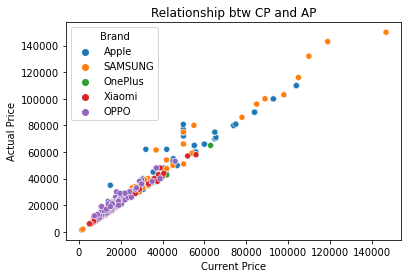

In [312]:
ax = sns.scatterplot(mobiles_data['Current_Price'],mobiles_data['Actual_Price'],hue = mobiles_data['Brand'])
ax.set(xlabel = 'Current Price', ylabel = 'Actual Price',title = 'Relationship btw CP and AP')
plt.show()

It is clearly shown that Actual Price and Current Price has a perfect linear relationship.

C:\Users\surya\AppData\Local\Temp\ipykernel_26572\1487379161.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


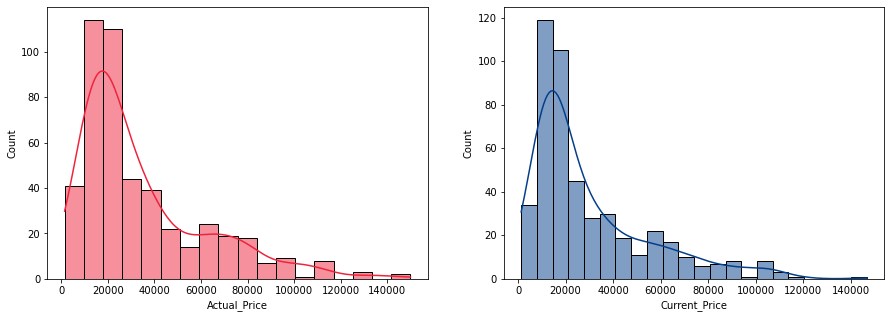

In [313]:
fig,ax = plt.subplots(1,2,figsize = (15,5))
# ActualPrice
sns.histplot(mobiles_data['Actual_Price'],kde = True, ax = ax[0],color = '#ef233c')

# CurrentPrice
sns.histplot(mobiles_data['Current_Price'],kde = True, ax = ax[1],color = '#023e8a')

fig.show()

### Examining Ratings and Reviews:

In [314]:
mobiles_data[['No_Ratings','No_Reviews']].describe()

,No_Ratings,No_Reviews
count,4.750000e+02,475.000000
mean,7.689138e+04,7785.467368
std,1.834117e+05,23368.693103
min,9.000000e+00,0.000000
25%,1.881500e+03,183.000000
50%,9.578000e+03,877.000000
75%,8.037700e+04,6850.000000
max,1.341091e+06,212224.000000


### Highest no.of Ratings & Reviews for Brands: 

In [315]:
x = mobiles_data.groupby('Brand').No_Ratings.sum().sort_values(ascending = False)
y = mobiles_data.groupby('Brand').No_Reviews.sum().sort_values(ascending = False)
df = pd.concat([x,y],axis = 1)
print(df)

         No_Ratings  No_Reviews
Brand                          
Xiaomi     20815714     2359178
Apple       8246203      657336
SAMSUNG     4517597      432360
OPPO        2943223      249162
OnePlus         667          61


### Visualising the value counts of Ratings and Reviews grouped by Brands

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surya\AppData\Local\Temp\ipykernel_26572\72512746.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


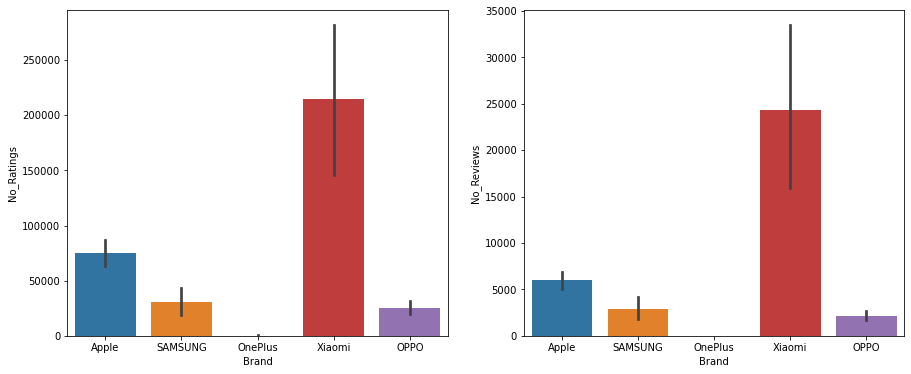

In [316]:
fig,ax = plt.subplots(1,2,figsize = (15,6))

# No_Ratings..
sns.barplot(mobiles_data['Brand'],mobiles_data['No_Ratings'],ax = ax[0])

# No_Reviews..
sns.barplot(mobiles_data['Brand'],mobiles_data['No_Reviews'],ax = ax[1])

fig.show()

This clearly shows that **Xiaomi** brand has more Number of Reviews & Ratings followed by (**Apple**, **Samsung**, **OPPO**, **Oneplus**)

### Insights of Current Price and Actual Price of different Brands:

#### Apple Data:

In [317]:
apple_data[['Actual_Price','Current_Price']].corr()

,Actual_Price,Current_Price
Actual_Price,1.000000,0.968777
Current_Price,0.968777,1.000000


#### Samsung Data:

In [318]:
samsung_data[['Actual_Price','Current_Price']].corr()

,Actual_Price,Current_Price
Actual_Price,1.00000,0.99187
Current_Price,0.99187,1.00000


#### Oneplus Data:

In [319]:
oneplus_data[['Actual_Price','Current_Price']].corr()

,Actual_Price,Current_Price
Actual_Price,1.00000,0.99908
Current_Price,0.99908,1.00000


#### Xiaomi Data:

In [320]:
redmi_data[['Actual_Price','Current_Price']].corr()

,Actual_Price,Current_Price
Actual_Price,1.000000,0.993559
Current_Price,0.993559,1.000000


#### OPPO Data:

In [321]:
oppo_data[['Actual_Price','Current_Price']].corr()

,Actual_Price,Current_Price
Actual_Price,1.00000,0.96277
Current_Price,0.96277,1.00000


### Visualising CP&AP for Different Brands:

C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\surya\anacond

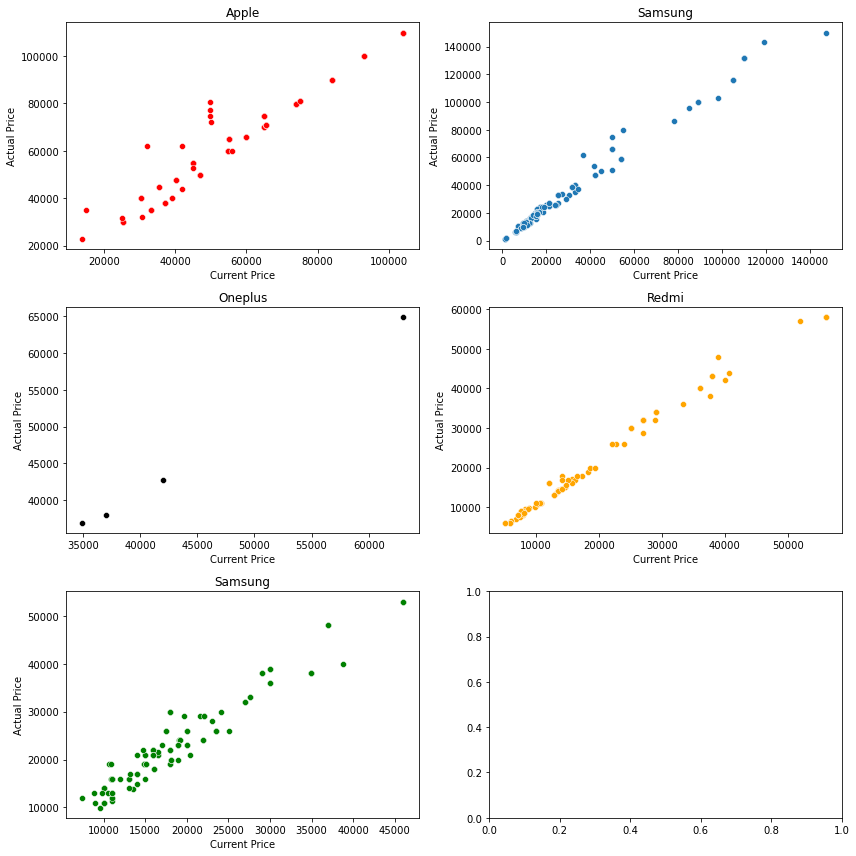

In [322]:
fig,axes = plt.subplots(3,2,figsize = (12,12))
# Apple plotting...
apple = sns.scatterplot(apple_data['Current_Price'],apple_data['Actual_Price'],color = 'red',ax = axes[0][0])
apple.set(title = 'Apple',xlabel = 'Current Price',ylabel = 'Actual Price')

# Samsung plotting...
samsung = sns.scatterplot(samsung_data['Current_Price'],samsung_data['Actual_Price'],ax = axes[0][1])
samsung.set(title = 'Samsung',xlabel = 'Current Price',ylabel = 'Actual Price')

# Oneplus plotting..
oneplus = sns.scatterplot(oneplus_data['Current_Price'],oneplus_data['Actual_Price'],color = 'black',ax = axes[1][0])
oneplus.set(title = 'Oneplus',xlabel = 'Current Price',ylabel = 'Actual Price')

# Redmi plotting..
redmi = sns.scatterplot(redmi_data['Current_Price'],redmi_data['Actual_Price'],ax = axes[1][1],color = 'orange')
redmi.set(title = 'Redmi',xlabel = 'Current Price',ylabel = 'Actual Price')

# OPPO plotting..
oppo = sns.scatterplot(oppo_data['Current_Price'],oppo_data['Actual_Price'],ax = axes[2][0],color = 'green')
oppo.set(title = 'Samsung',xlabel = 'Current Price',ylabel = 'Actual Price')

fig.tight_layout()
fig.show()

# Conclusion:
- **Xiaomi** brand has more Number of Reviews & Ratings followed by (**Apple**, **Samsung**, **OPPO**, **Oneplus**).
- Current Price & Actual Price has a perfect linear relationship.